In [1]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import patheffects as pe
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

import regex as re

from tqdm import tqdm_pandas
from tqdm.notebook import trange, tqdm

import tqdm

from collections import defaultdict, namedtuple

plt.rcParams["figure.figsize"] = (15, 10)
pd.set_option('display.max_colwidth', 100)

## Show some statistics on data

In [2]:
df = pd.read_csv('data/full_df_v_0.1.csv')

In [3]:
df.sample(7)

,phrase,category,source,source_type,full_source
8321,Каб табе язык прутам стаў! Яглевічы Ягл.,ПРАКЛЁНЫ,Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны,book,"Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны, page 179"
1492,"Каму клапатно, а папу палатно. \nа) Роду клапатно, а папу палатно.","ПОП, КСЕНДЗ. ЦАРКОУНЫЯ СЛУЖКІ",Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,book,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах
2128,"Hi мукі пылінкі, ні солі драбінкі. \na) Hi мукі пылінкі, ні солі драбінкі, ні гарэлкі расінкі.",ХАРЧАВАННЕ,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,book,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах
8030,"Дару дугою, каб не бегаў за другою.",ВЯСЕЛЬНЫЯ ПРЫГАВОРКІ ПРЫ ДЗЯЛЬБЕ КАРАВАЯ,Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны,book,"Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны, page 158"
641,"Калі за нязначнае правапарушэнне і сур’ёзнае злачынства прадугледжваецца аднолькавае пакаранне, ...",Андрэй Волян,dumki.org,webpage,dumki.org
3346,У астрог шмат дарог.,ЗАКОНЫ. ТУРМА,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,book,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах
3615,Яшчэ жыта на загоне — саквістатар у пагоне.,"РЭКРУТЧЫНА, САЛДАТЧЫНА. ВОЙНЫ. ВОДГУКІ НА ГІСТАРЫЧНЫЯ ПАДЗЕІ",Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,book,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах


In [57]:
for u in df.source.unique(
):
    print(u)

nlb.by
svaboda.org
dumki.org
Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах
Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны


### ydata-profiling

In [ ]:
#!pip install ydata-profiling

In [293]:
from ydata_profiling import ProfileReport

In [311]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file('report_for_full_df_v_0.1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### vanilla python exploratory analysis

#### source and source_type variables

In [168]:
# sourc_relations = df
source_circles = df.groupby(['source_type', 'source'], as_index=False)['phrase'].count().rename(columns={'phrase': 'entries'})
source_circles['source_type'] = source_circles['source_type'].apply(lambda x: 'кніга' if x == 'book' else 'вэб-старонка')
source_circles

,source_type,source,entries
0,кніга,Алесь Зайка. Прыказкі і прымаўкі з Косаўшчыны,3032
1,кніга,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,5764
2,вэб-старонка,dumki.org,682
3,вэб-старонка,nlb.by,101
4,вэб-старонка,svaboda.org,76


In [169]:
source_circles.loc[1, 'source'] = 'Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах'

In [306]:
palette_name = 'Set2'
sns.set_palette(palette_name, desat=1)
sns.color_palette(palette_name)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

<Figure size 4500x3000 with 0 Axes>

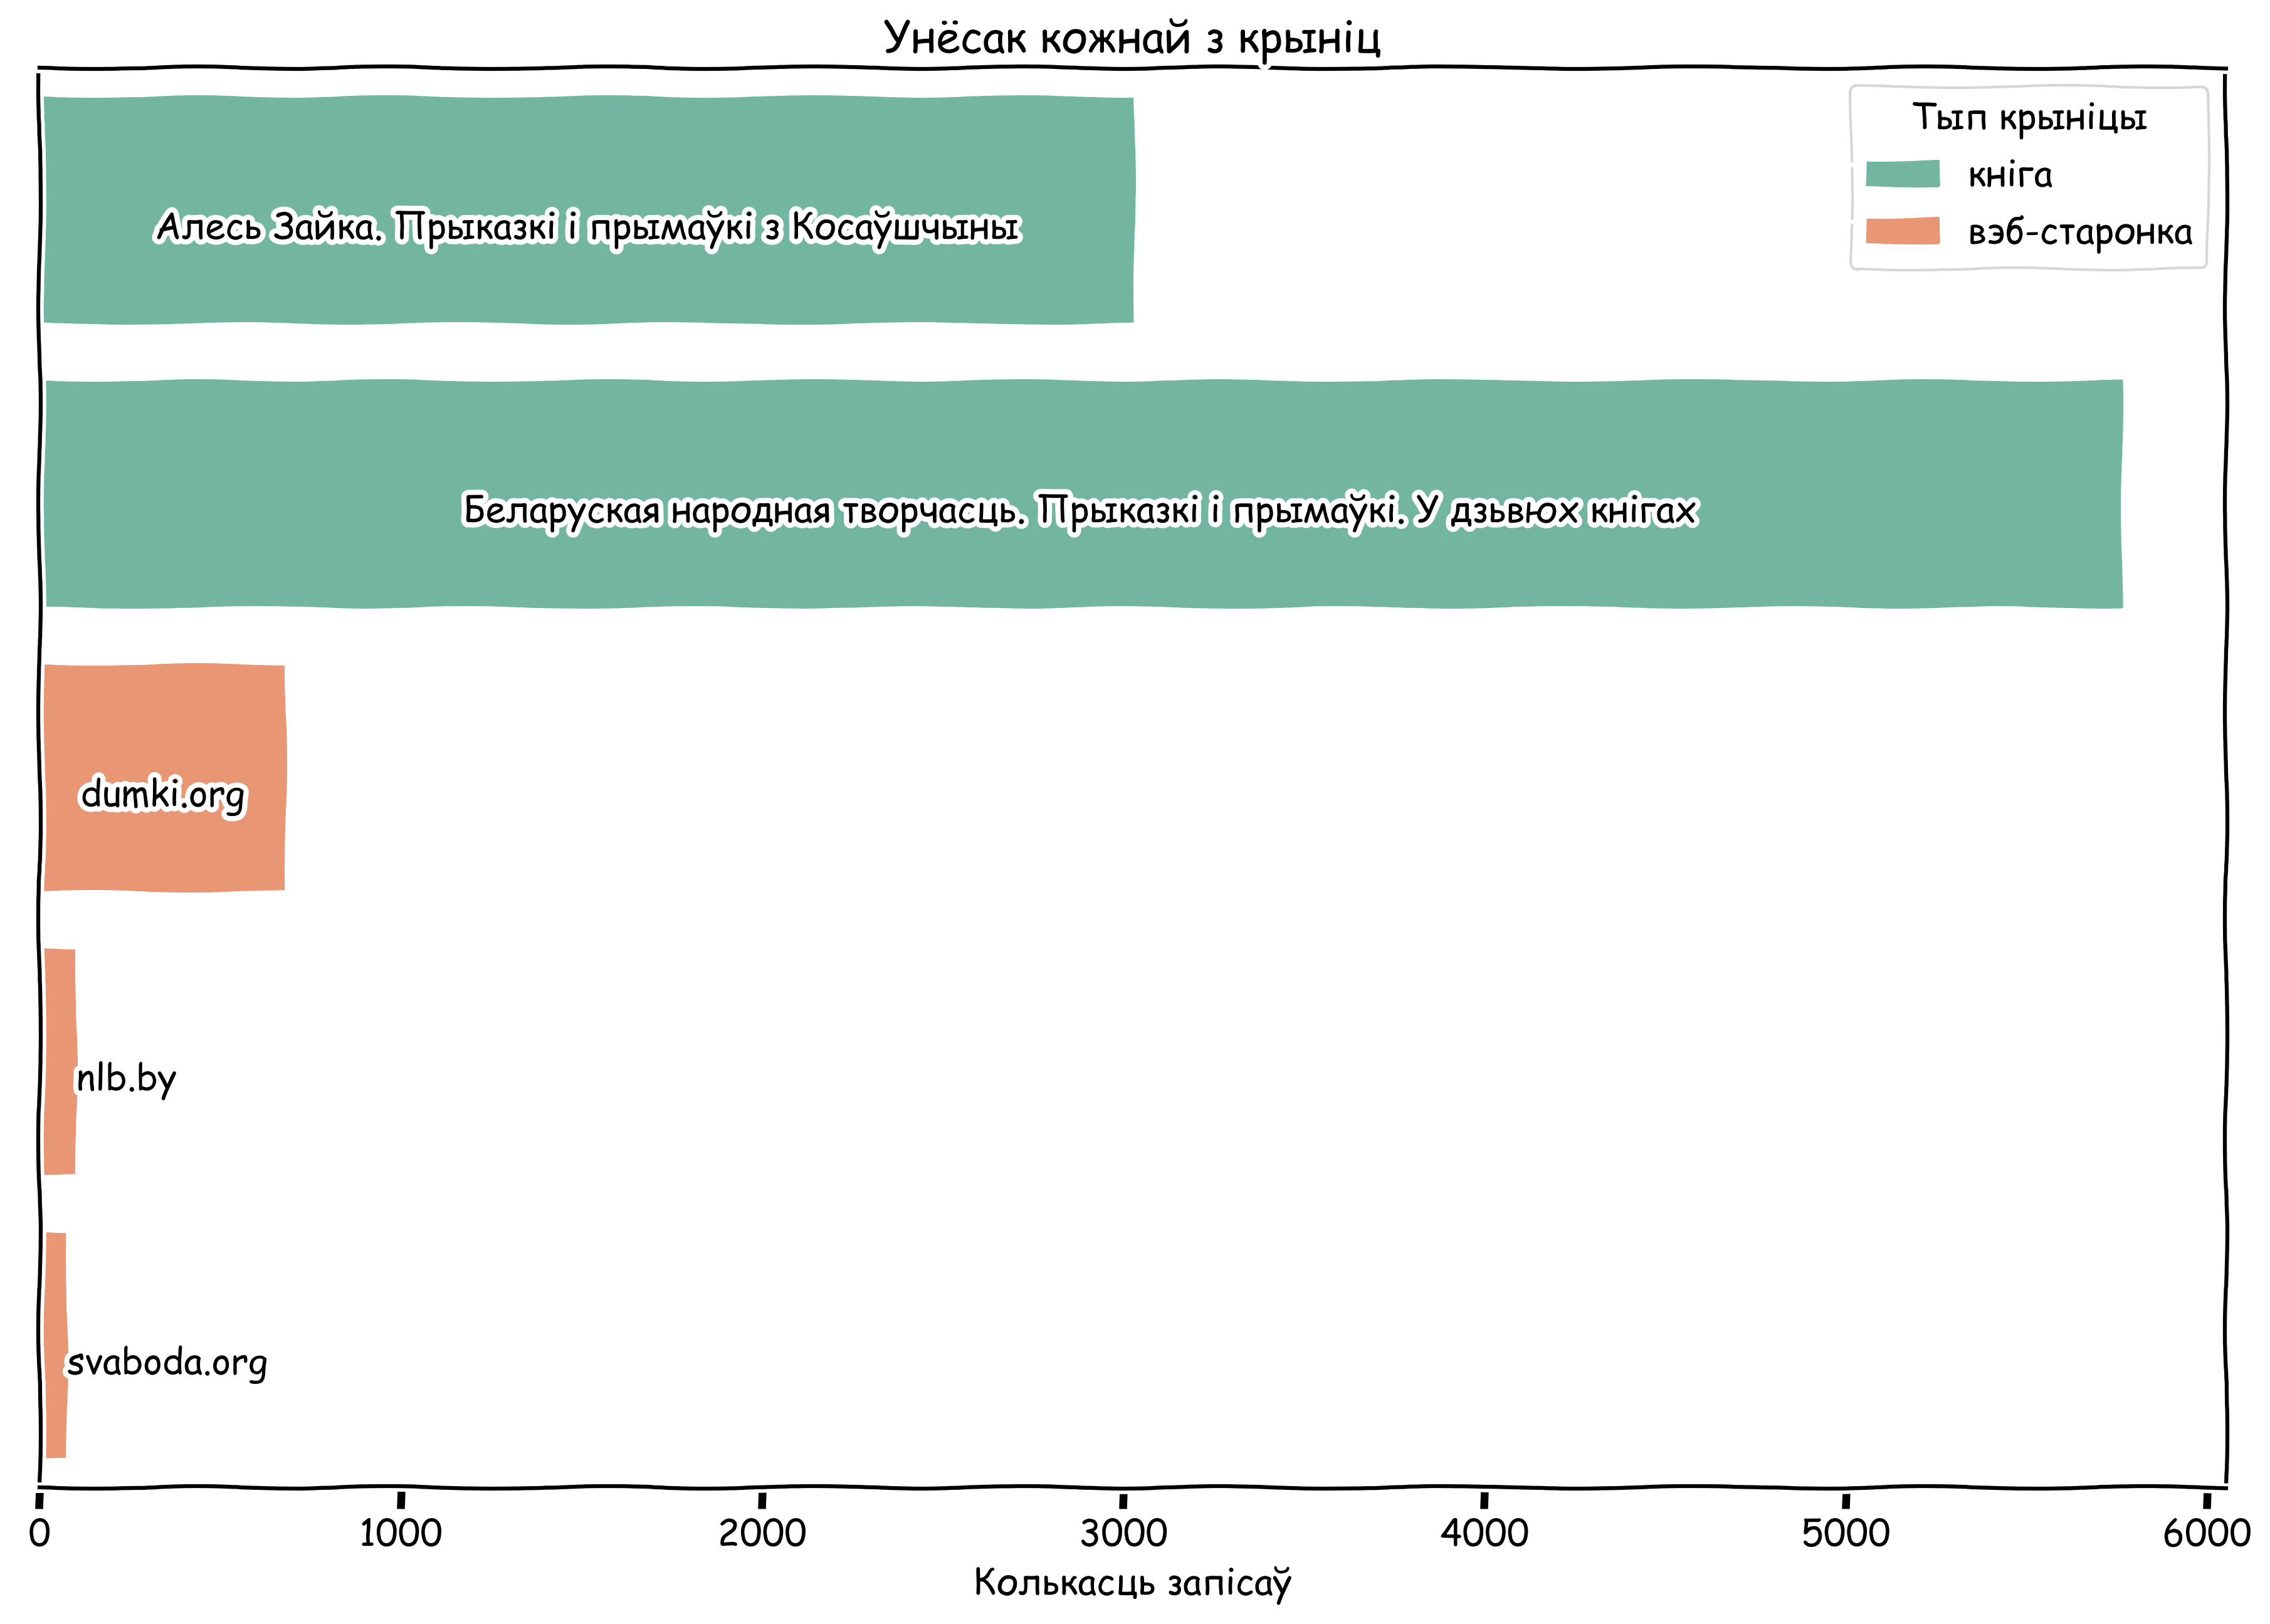

In [446]:
fig = plt.figure()
fig.dpi = 300

with plt.xkcd(scale=2, length=1000, randomness=0):
    fig = plt.figure()
    fig.dpi = 300
    
    ax = sns.barplot(source_circles, y='source', x='entries', 
                     hue='source_type',
                     dodge=False
              )
    ax.set_ylabel(None)
    ax.set_xlabel('Колькасць запісаў')
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.legend(title='Тып крыніцы')
    
    for i, (v, l) in enumerate(zip(source_circles['entries'],source_circles['source'])):
        if v > 500:
            ax.text(v/2, i, l, ha='center', va='top', color='black', fontsize=14)
        else:
            ax.text(v, i, l, ha='left', va='top', color='black', fontsize=14)
    
    plt.title('Унёсак кожнай з крыніц')

In [308]:
by_source_type = source_circles.groupby('source_type')['entries'].sum()
by_source_type

source_type
вэб-старонка     859
кніга           8796
Name: entries, dtype: int64

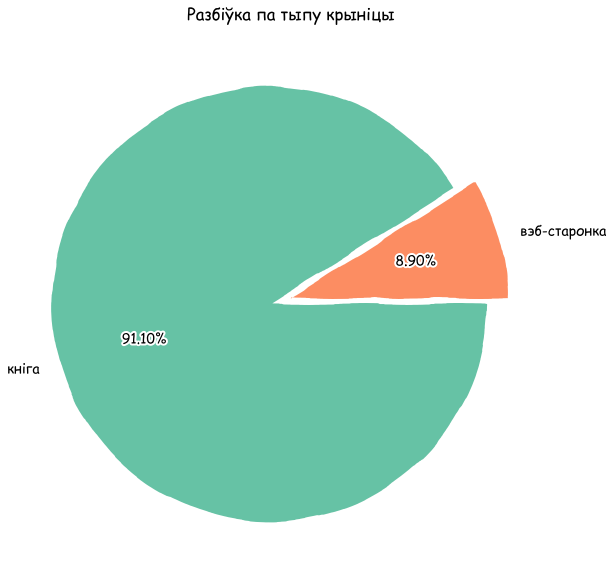

In [312]:
with plt.xkcd(scale=1, length=600, randomness=50):
    plt.pie(by_source_type,
            labels=by_source_type.index,
            autopct='%1.2f%%',
            
            explode=[0, 0.1],
            colors=reversed(sns.color_palette()[:2]),
        
           )
    cmap = plt.get_cmap()

    plt.title('Разбіўка па тыпу крыніцы')
    # plt.set_cmap(reversed(cmap))

#### categories exploration

In [426]:
categories_amount = df.groupby(['source_type', 'category'])['phrase'].count().reset_index()
categories_amount

quotes_amount = categories_amount[categories_amount.source_type == 'webpage'][['category', 'phrase']]
quotes_amount = quotes_amount.set_index('category')['phrase']
quotes_amount = quotes_amount.sort_values(ascending=False)

In [429]:
def draw_squarified(quotes_amount, colormap=matplotlib.cm.summer_r):
    ## SO MUCH HARDCODE, NOT GOOD
    fig = plt.figure()
    fig.dpi = 300
    
    cmap = colormap
    mini=min(quotes_amount)
    maxi=max(quotes_amount)
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in quotes_amount]
    
    labels = []
    for lbl, val in quotes_amount.items():
        label = f'{lbl} [{val}]'
        if len(label) >= 20:
            label = '\n'.join(label.split(' '))
        
        labels.append(label)
    
    
    with plt.xkcd(scale=5, length=1500, randomness=30):
        ax = squarify.plot(
            quotes_amount,
            # label=labels,
            color=colors,
        )
    
        for patch, value, label in zip(ax.patches, quotes_amount.values, labels):
            left, bottom, width, height = patch.get_bbox().bounds
            
            if value > 47:
                label_size = 15
            elif value > 10:
                label_size = 7.5
            elif value > 3:
                label_size = 5
            elif value > 2:
                label_size = 3
            else:
                label_size = 2
                ax.annotate(
                        label,
                        xy=(left+width/2, 
                            bottom+height/2),
                        ha='center',
                        va='center',
                        rotation=0,
                        fontsize=label_size,
    
                        path_effects=[pe.withStroke(linewidth=1, foreground='white')]
                )
                # patch.set_backgroundcolor('none')
                continue
            
            # label_size = width * 29 * 0.3 / len(label)
            
            ax.annotate(
                        label,
                        xy=(left+width/2, 
                            bottom+height/2),
                        ha='center',
                        va='center',
                        rotation=0,
                        fontsize=label_size)
            
        plt.title('Катэгорыі з вэб-старонак. Па сутнасці аўтары цытат')
        plt.axis('off')

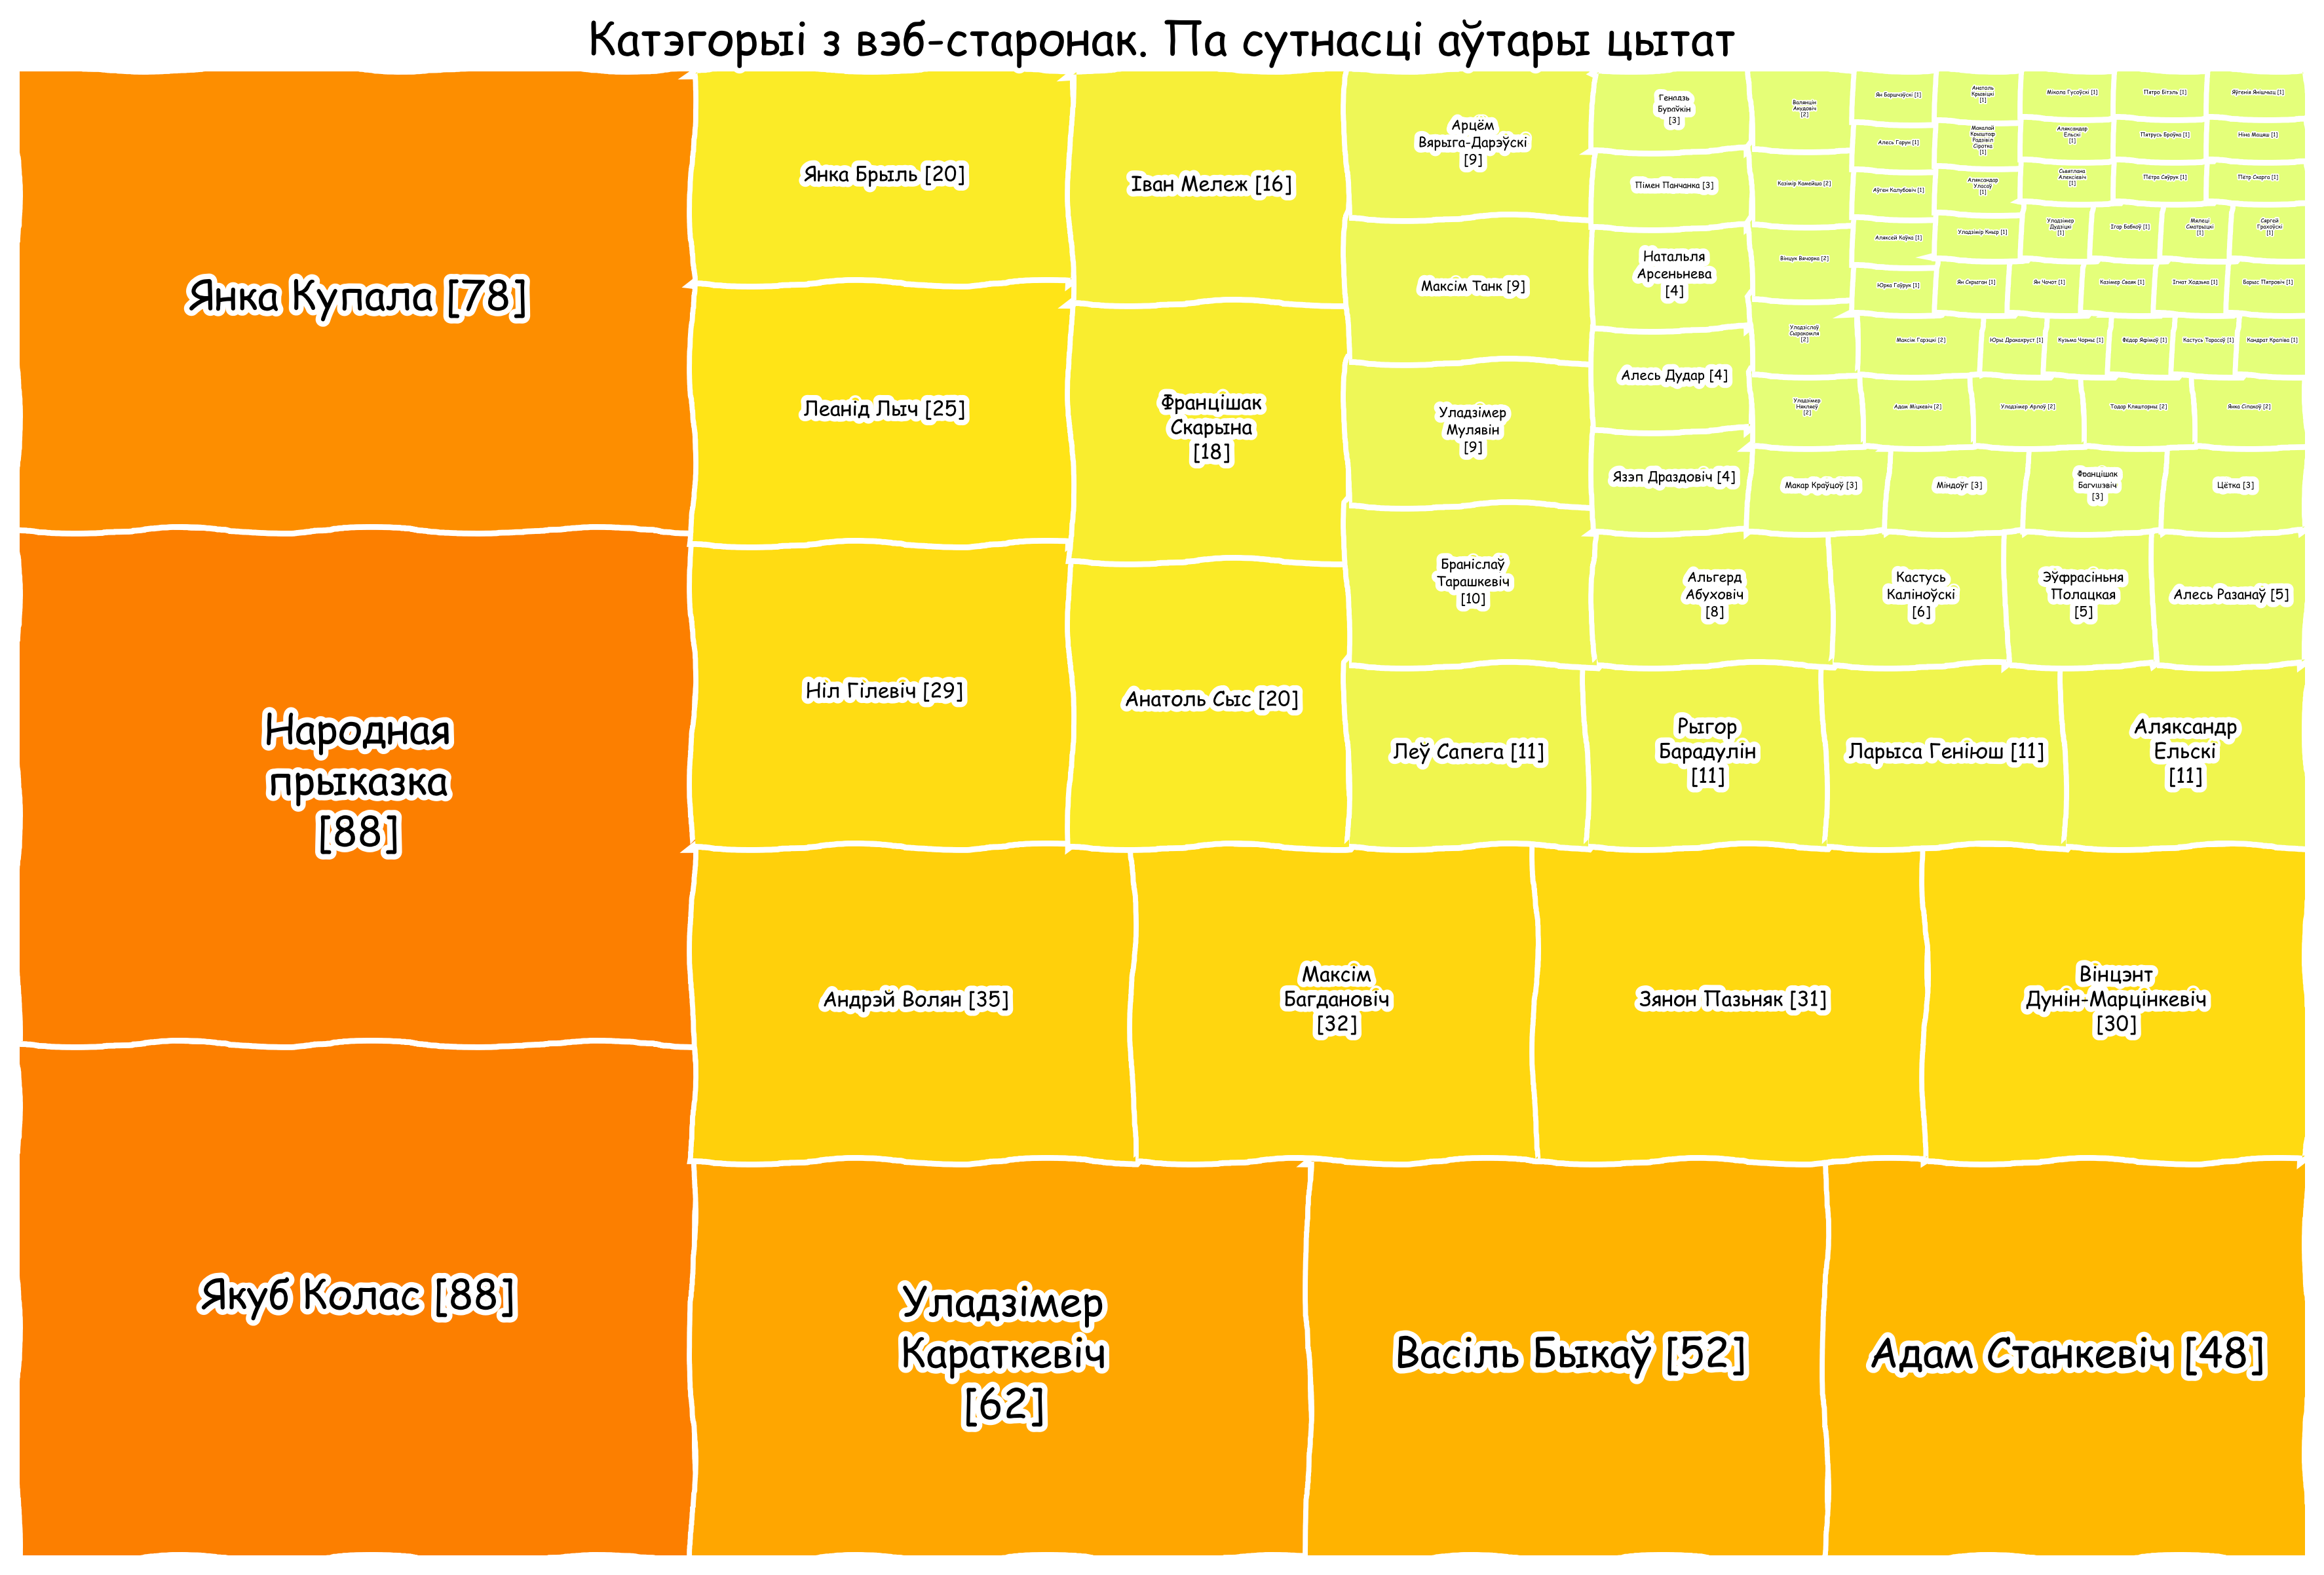

In [430]:
draw_squarified(quotes_amount, matplotlib.cm.Wistia)

#### bnt_squares

,source,category,phrase
0,dumki.org,Іван Мележ,16
1,dumki.org,Адам Міцкевіч,2
2,dumki.org,Адам Станкевіч,48
3,dumki.org,Алесь Гарун,1
4,dumki.org,Алесь Дудар,4
...,...,...,...
132,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,СЯБРОУСТВА. ВАРОЖАСЦЬ. СУСЕДСТВА. ГАСЦІННАСЦЬ,303
133,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,ТРАНСПАРТНЫЯ СРОДКІ I ШЛЯХІ ЗНОСІН. У ДАРОЗЕ,119
134,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,ХАРЧАВАННЕ,594
135,Беларуская народная творчасць. Прыказкі і прымаўкі. У дзьвюх кнігах,"ХАТА, ХАТНЯЕ АБСТАЛЯВАННЕ I НАЧЫННЕ",114


In [440]:
categories_amount = df.groupby(['source', 'category'])['phrase'].count().reset_index()
categories_amount

quotes_amount = categories_amount[categories_amount.source.str.contains('народная творчасць')][['category', 'phrase']]
quotes_amount = quotes_amount.set_index('category')['phrase']
quotes_amount = quotes_amount.sort_values(ascending=False)

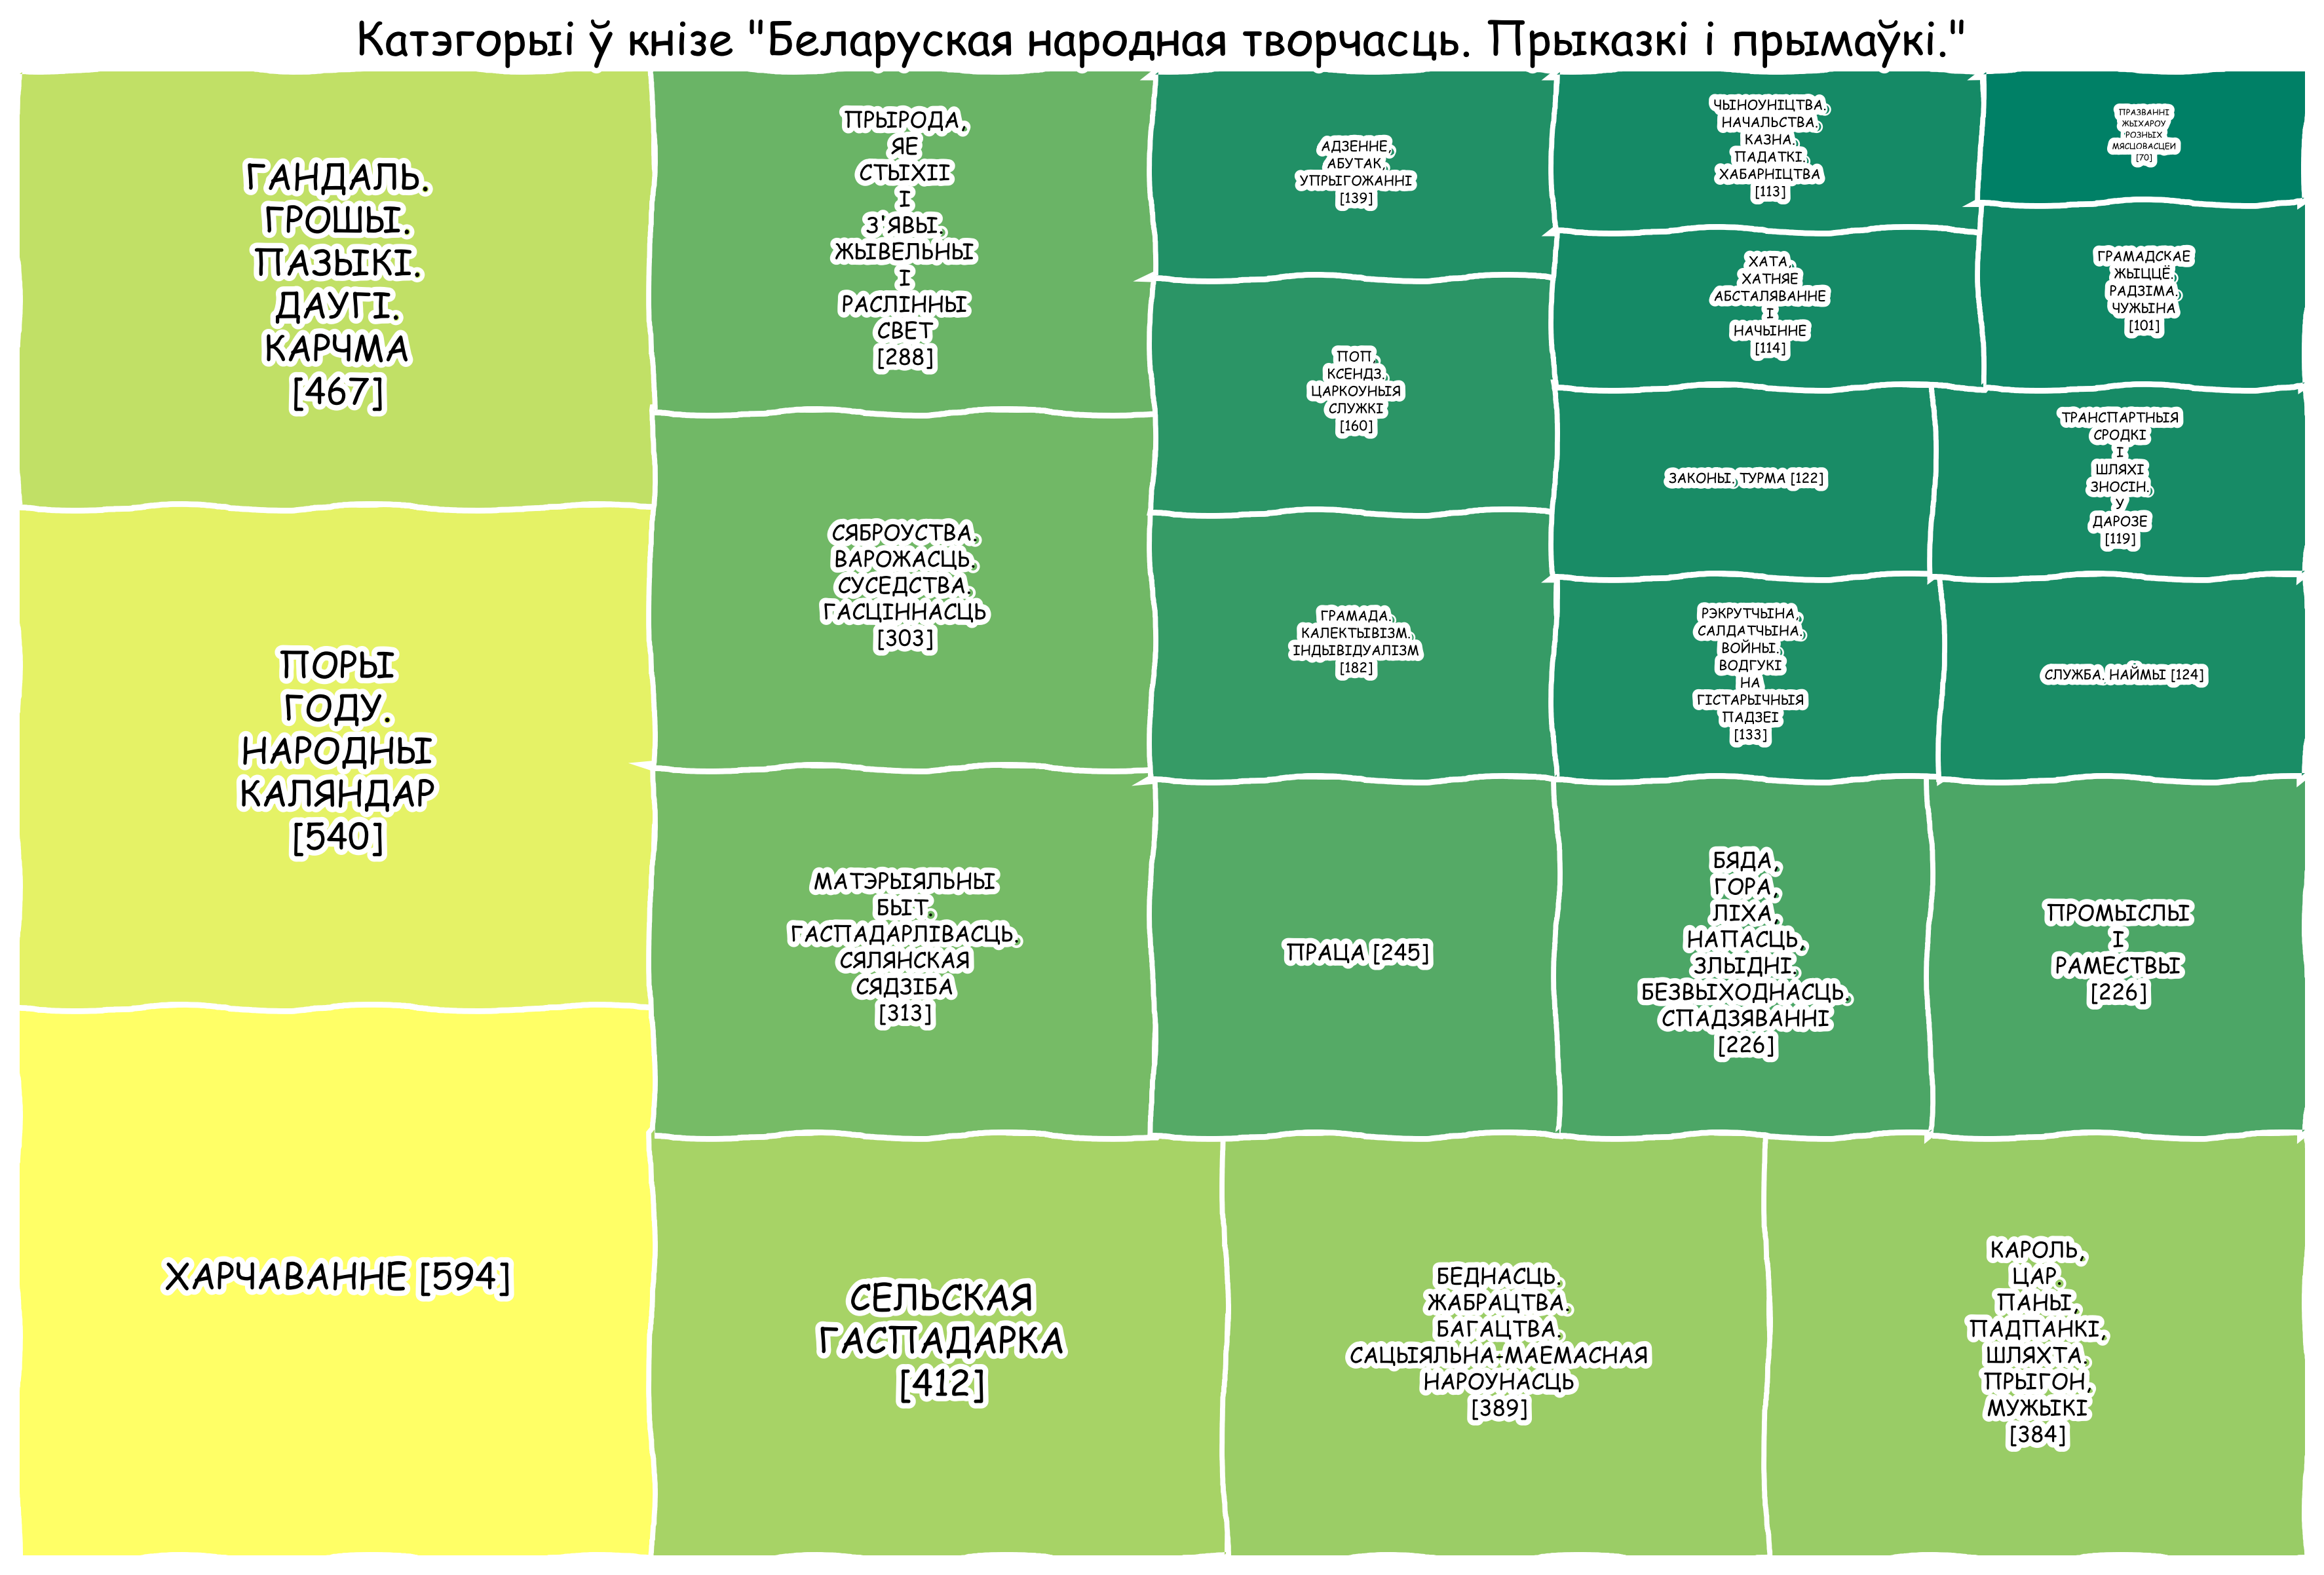

In [442]:
colormap = matplotlib.cm.summer

## SO MUCH HARDCODE, NOT GOOD
fig = plt.figure()
fig.dpi = 300

cmap = colormap
mini=min(quotes_amount)
maxi=max(quotes_amount)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in quotes_amount]

labels = []
for lbl, val in quotes_amount.items():
    label = f'{lbl} [{val}]'
    if len(label) >= 25:
        label = '\n'.join(label.split(' '))
    
    labels.append(label)


with plt.xkcd(scale=5, length=1500, randomness=30):
    ax = squarify.plot(
        quotes_amount,
        # label=labels,
        color=colors,
    )

    for patch, value, label in zip(ax.patches, quotes_amount.values, labels):
        left, bottom, width, height = patch.get_bbox().bounds
        
        if value > 400:
            label_size = 13
        elif value > 220:
            label_size = 8
        elif value > 100:
            label_size = 5
        elif value > 50:
            label_size = 3
        else:
            label_size = 2
            ax.annotate(
                    label,
                    xy=(left+width/2, 
                        bottom+height/2),
                    ha='center',
                    va='center',
                    rotation=0,
                    fontsize=label_size,

                    path_effects=[pe.withStroke(linewidth=1, foreground='white')]
            )
            # patch.set_backgroundcolor('none')
            continue
        
        # label_size = width * 29 * 0.3 / len(label)
        
        ax.annotate(
                    label,
                    xy=(left+width/2, 
                        bottom+height/2),
                    ha='center',
                    va='center',
                    rotation=0,
                    fontsize=label_size)
        
    plt.title('Катэгорыі ў кнізе "Беларуская народная творчасць. Прыказкі і прымаўкі."')
    plt.axis('off')

#### cosaushchyna_squares

In [443]:
categories_amount = df.groupby(['source', 'category'])['phrase'].count().reset_index()
categories_amount

quotes_amount = categories_amount[categories_amount.source.str.contains('Косаўшчыны')][['category', 'phrase']]
quotes_amount = quotes_amount.set_index('category')['phrase']
quotes_amount = quotes_amount.sort_values(ascending=False)

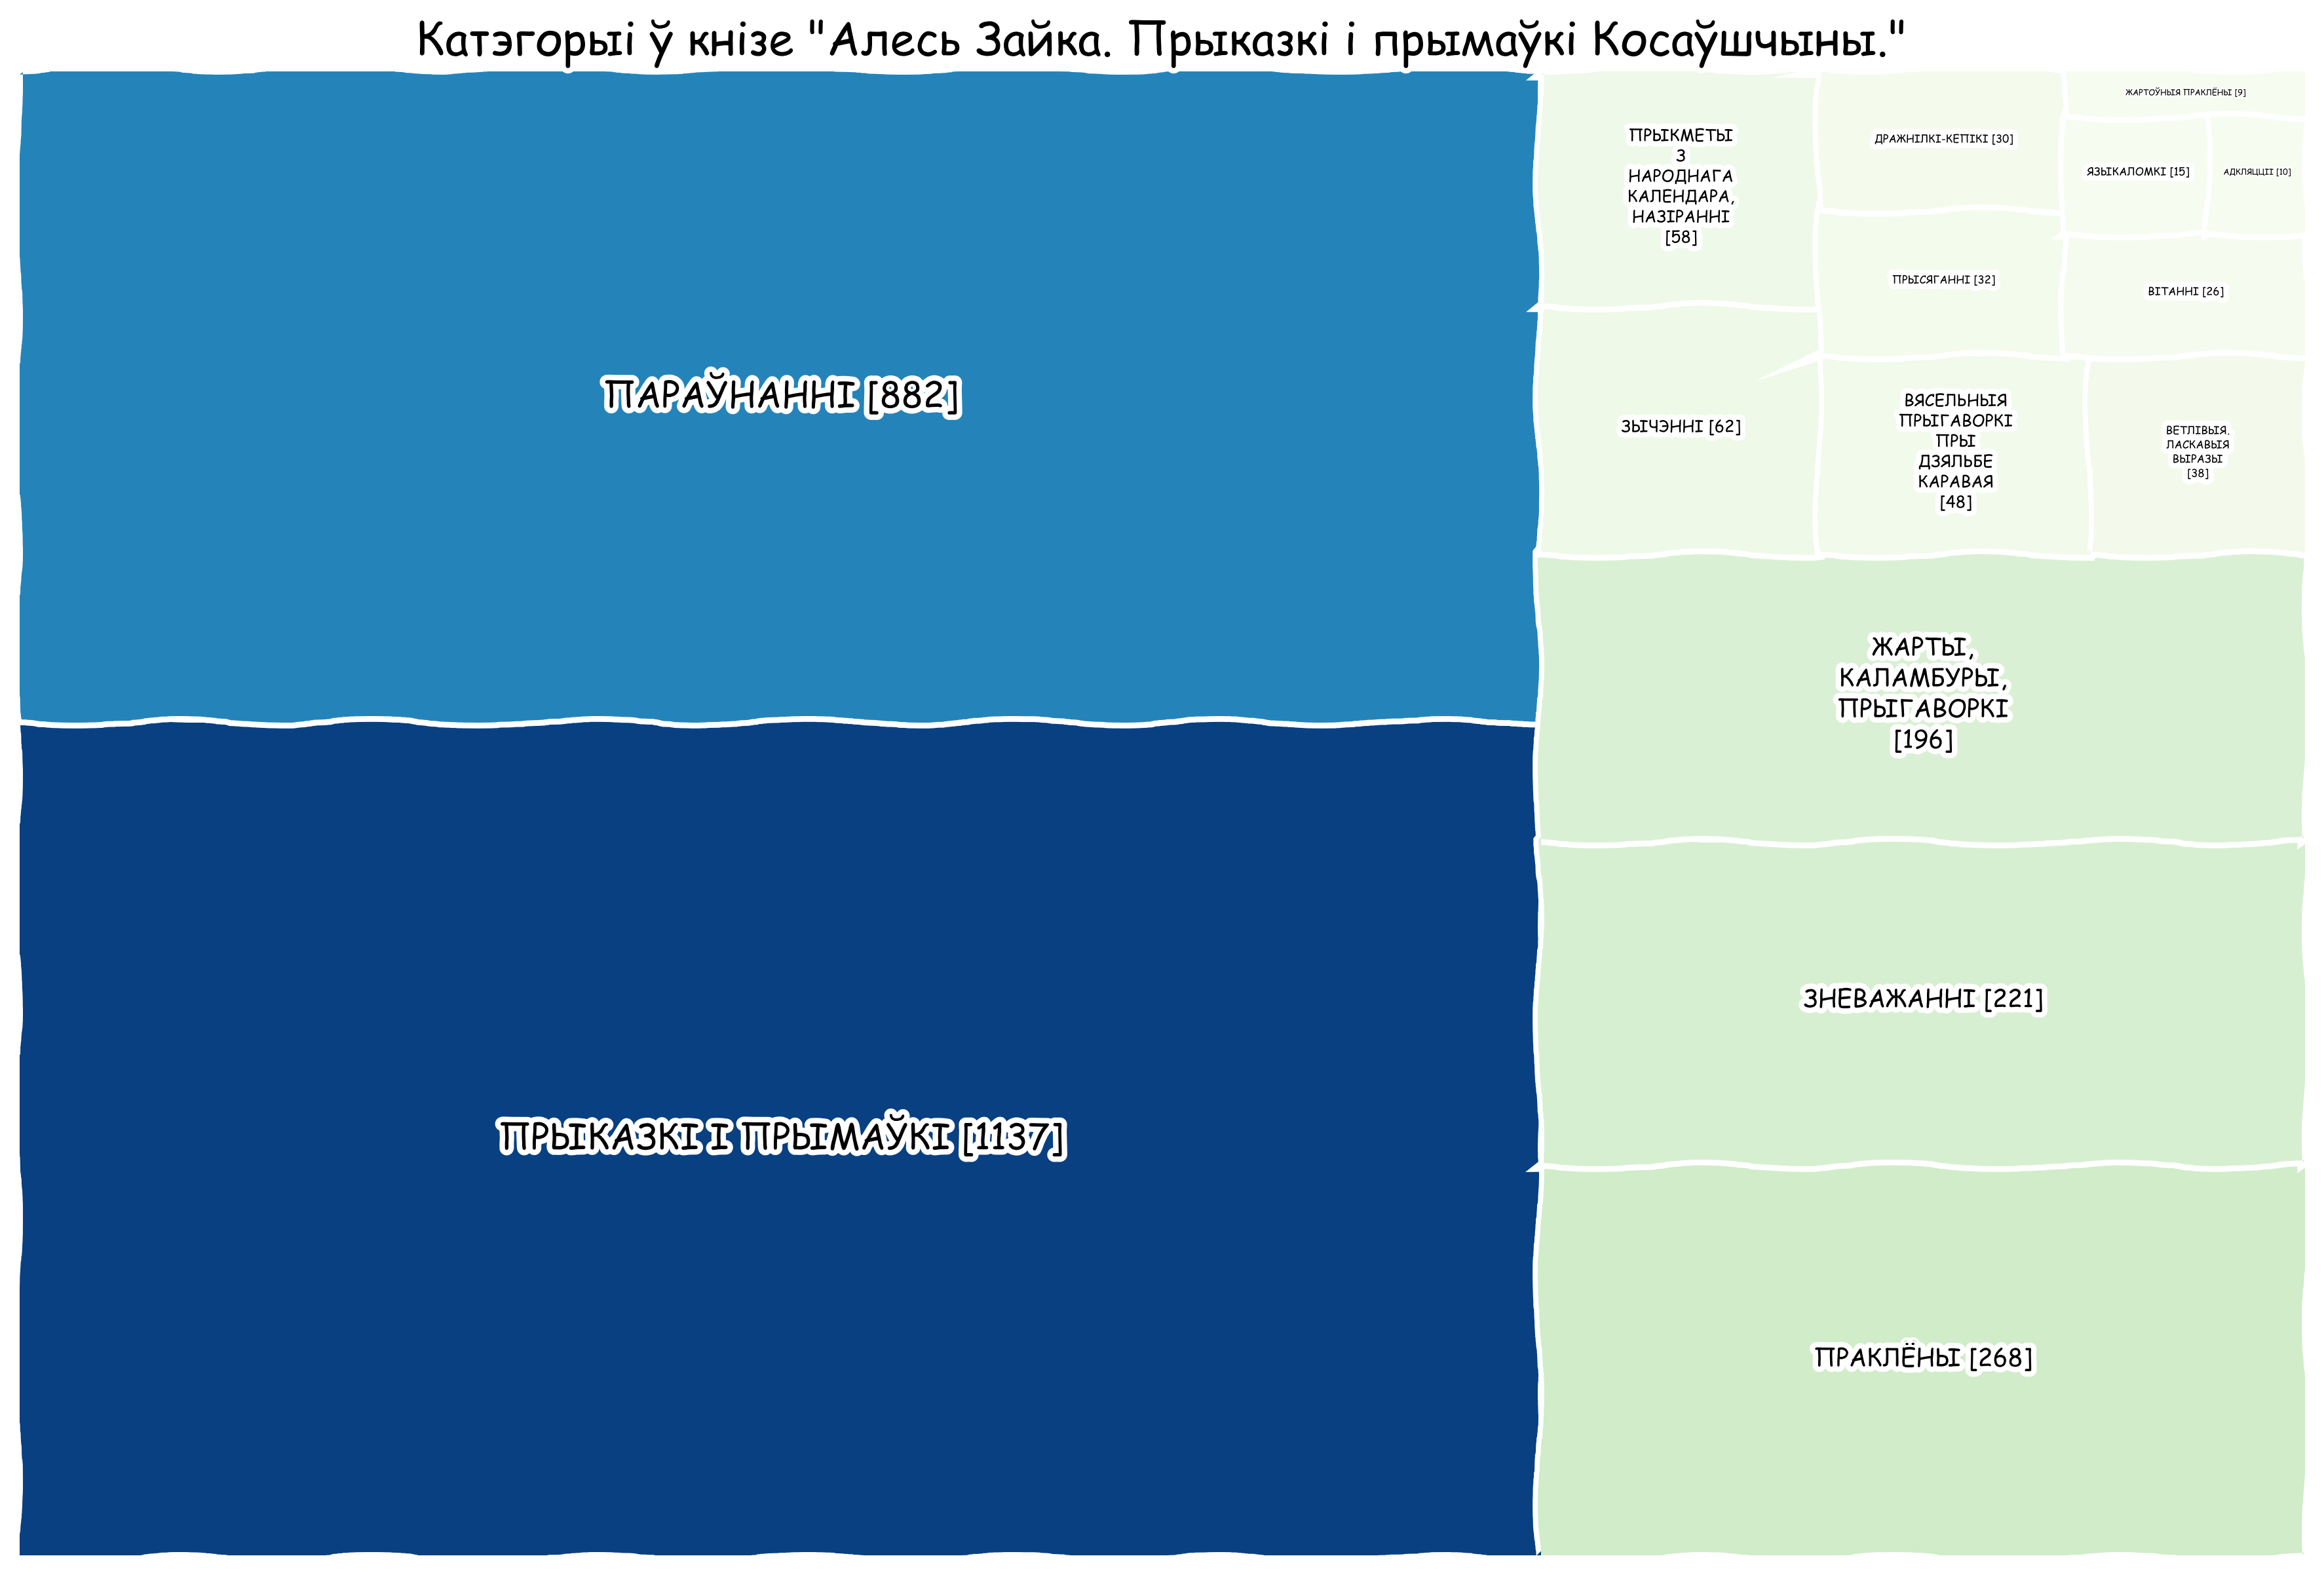

In [445]:
colormap = matplotlib.cm.GnBu

## SO MUCH HARDCODE, NOT GOOD
fig = plt.figure()
fig.dpi = 300

cmap = colormap
mini=min(quotes_amount)
maxi=max(quotes_amount)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in quotes_amount]

labels = []
for lbl, val in quotes_amount.items():
    label = f'{lbl} [{val}]'
    if len(label) >= 30:
        label = '\n'.join(label.split(' '))
    
    labels.append(label)


with plt.xkcd(scale=5, length=1500, randomness=30):
    ax = squarify.plot(
        quotes_amount,
        # label=labels,
        color=colors,
    )

    for patch, value, label in zip(ax.patches, quotes_amount.values, labels):
        left, bottom, width, height = patch.get_bbox().bounds
        
        if value > 400:
            label_size = 13
        elif value > 180:
            label_size = 9
        elif value > 40:
            label_size =6
        elif value > 10:
            label_size = 4
        else:
            label_size = 3
            ax.annotate(
                    label,
                    xy=(left+width/2, 
                        bottom+height/2),
                    ha='center',
                    va='center',
                    rotation=0,
                    fontsize=label_size,

                    path_effects=[pe.withStroke(linewidth=1, foreground='white')]
            )
            # patch.set_backgroundcolor('none')
            continue
        
        # label_size = width * 29 * 0.3 / len(label)
        
        ax.annotate(
                    label,
                    xy=(left+width/2, 
                        bottom+height/2),
                    ha='center',
                    va='center',
                    rotation=0,
                    fontsize=label_size)
        
    plt.title('Катэгорыі ў кнізе "Алесь Зайка. Прыказкі і прымаўкі Косаўшчыны."')
    plt.axis('off')